### Importing required libraries ###

In [1]:
import cv2
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity
from numpy import dot
from numpy.linalg import norm
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from rembg import remove
%matplotlib inline
import re

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Display and comparison of two images using the similarity algorithms ###

In [4]:
def img_compare(fname1,fname2,rmv_bg): 
    
    # open images #

    f1 = Image.open(fname1)
    f2 = Image.open(fname2)
    
    
    # remove background #
    
    if(rmv_bg ==1):
        f1 = remove(f1)
        f2 = remove(f2)
    
    # using .resize to scale image 2 to match image 1 dimensions #

    f1_reshape = f1.resize((round(f1.size[0]), round(f1.size[1])))
    f2_reshape = f2.resize((round(f1.size[0]), round(f1.size[1])))
    
    # display resized images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(f1_reshape)
    ax[1].imshow(f2_reshape)

    # convert the images to (R,G,B) arrays #

    f1_array = np.array(f1_reshape)
    f2_array = np.array(f2_reshape)

    # flatten the arrays to one dimensional vectors

    f1_array = f1_array.flatten()
    f2_array = f2_array.flatten()
    

    # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale #

    a = f1_array/255
    b = f2_array/255
    
    cos_similarity = dot(a, b)/(norm(a)*norm(b))
    ssim = structural_similarity(a,b,data_range=1)
    
    print('Cosine similarity:' + str(round(cos_similarity,3)))
    print('structural similarity index measure:' + str(round(ssim,3)))

## Comparison using different encoder (input) but same decoder (output) : with background ##

#### GIT-base encoder and stable diffusion decoder ####

Cosine similarity:0.801
structural similarity index measure:0.578


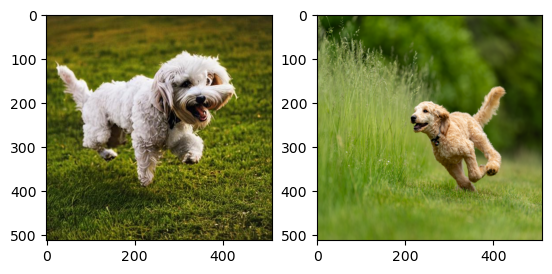

In [5]:
img_compare('gitbase_stable_diff.jpg','browndog.jpg',0)

#### GIT-large encoder and stable diffusion decoder ####

Cosine similarity:0.824
structural similarity index measure:0.564


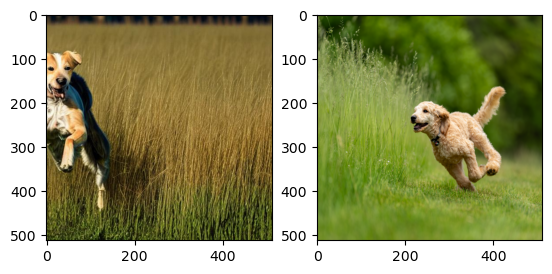

In [6]:
img_compare('gitlarge_stable_diff.jpg','browndog.jpg',0)

#### BLIP-base encoder and stable diffusion decoder ####

Cosine similarity:0.723
structural similarity index measure:0.442


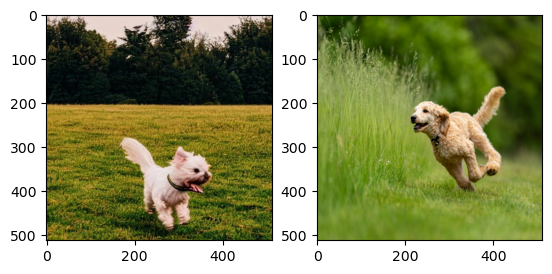

In [7]:
img_compare('blipbase_stable_diff.jpg','browndog.jpg',0)

#### BLIP-large encoder and stable diffusion decoder ####

Cosine similarity:0.837
structural similarity index measure:0.609


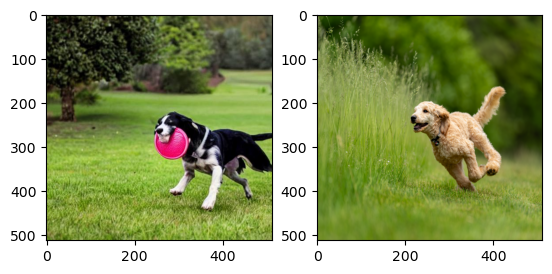

In [8]:
img_compare('bliplarge_stable_diff.jpg','browndog.jpg',0)

#### ViT+GPT-2 encoder and stable diffusion decoder ####

Cosine similarity:0.867
structural similarity index measure:0.708


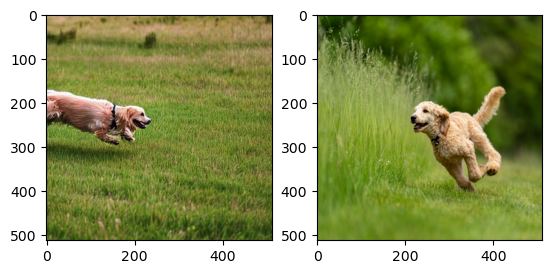

In [9]:
img_compare('vitgpt2_stable_diff.jpg','browndog.jpg',0)

### Plotting performences of two similarity metrices by five encoder models ###

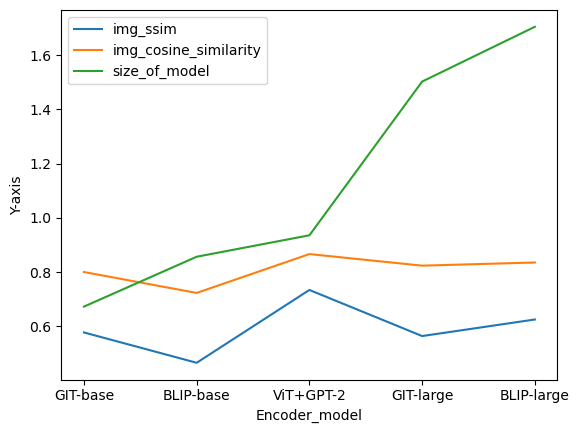

In [10]:
cosine_similaritys = [0.800615241565599, 0.723466372397781,0.866809837251967, 0.824071129785272,0.835734604032179]
ssims = [0.577732198537648,0.465884407542704,0.734460836885503,0.564453940299473,0.625499957632813]

size_of_model = [.673,.857,.936,1.503,1.705]

x = ['GIT-base','BLIP-base','ViT+GPT-2','GIT-large','BLIP-large']

plt.plot(x, ssims, label='img_ssim')
plt.plot(x, cosine_similaritys, label='img_cosine_similarity')
plt.plot(x, size_of_model, label='size_of_model')
plt.xlabel('Encoder_model')
plt.ylabel('Y-axis')
plt.legend()

### Comparison using different encoder (input) but same decoder (output) : without background ###

Cosine similarity:0.322
structural similarity index measure:0.75


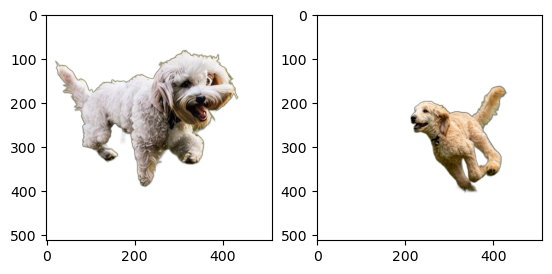

In [13]:
#### GIT-base encoder and stable diffusion decoder ####

img_compare('gitbase_stable_diff.jpg','browndog.jpg',1)

Cosine similarity:0.0
structural similarity index measure:0.77


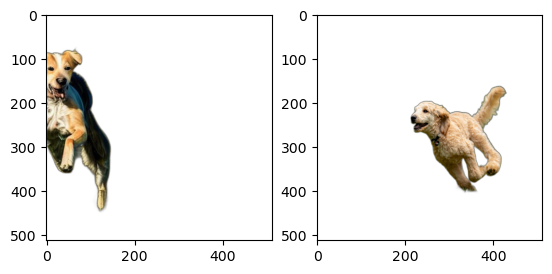

In [14]:
#### GIT-large encoder and stable diffusion decoder ####

img_compare('gitlarge_stable_diff.jpg','browndog.jpg',1)

Cosine similarity:0.166
structural similarity index measure:0.847


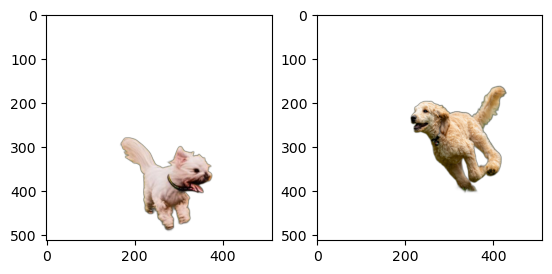

In [15]:
#### BLIP-base encoder and stable diffusion decoder ####

img_compare('blipbase_stable_diff.jpg','browndog.jpg',1)

Cosine similarity:0.473
structural similarity index measure:0.87


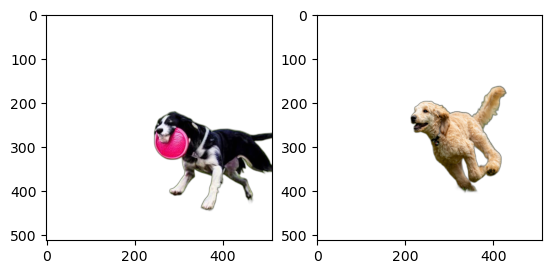

In [16]:
#### BLIP-large encoder and stable diffusion decoder ####

img_compare('bliplarge_stable_diff.jpg','browndog.jpg',1)

Cosine similarity:0.022
structural similarity index measure:0.828


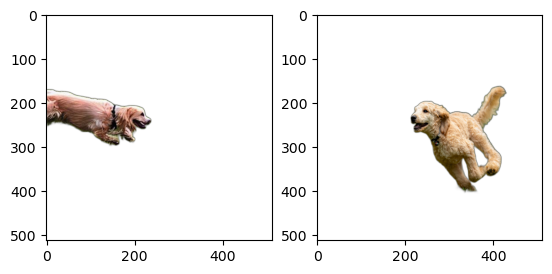

In [17]:
#### ViT+GPT-2 encoder and stable diffusion decoder ####

img_compare('vitgpt2_stable_diff.jpg','browndog.jpg',1)

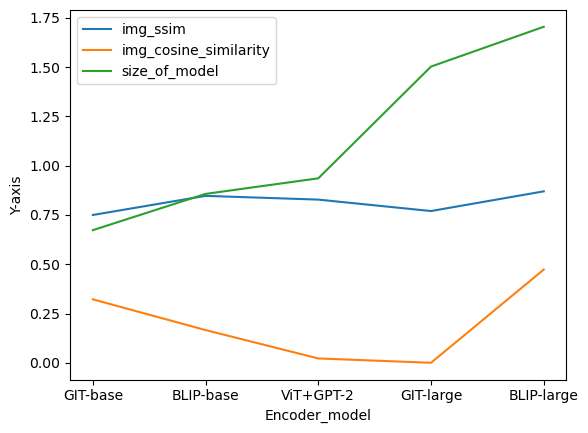

In [18]:
### Plotting performences of two similarity metrices by five encoder models without background###

cosine_similaritys = [0.322,.166,0.022,0.0,0.473]

ssims = [0.75,0.847,0.828,0.77,0.87]

size_of_model = [.673,.857,.936,1.503,1.705]
x = ['GIT-base','BLIP-base','ViT+GPT-2','GIT-large','BLIP-large']

plt.plot(x, ssims, label='img_ssim')
plt.plot(x, cosine_similaritys, label='img_cosine_similarity')
plt.plot(x, size_of_model, label='size_of_model')

plt.xlabel('Encoder_model')
plt.ylabel('Y-axis')
plt.legend()

### comparison of  captions generated by different models from same image using the similarity algorithms ###

In [19]:
# importing required libraries #

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import math

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nemo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nemo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# pre-processing the text #

def text_preprocess(text):

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    
    # removing the stop words and non alphaneumeric words#
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return Counter(tokens) # tokenizing it

In [21]:
def txt_cosine_sim(text1, text2):
    
    # preprocessing #
    vec1 = text_preprocess(text1)
    vec2 = text_preprocess(text2)
    
    
    intersection = set(vec1.keys()) & set(vec2.keys()) # calculating common words
    numerator = sum([vec1[x] * vec2[x] for x in intersection]) # calculating the dot products
    
    # calculating the magnitude of vectors
    
    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    
    # Putting back to the cosine similarity formula
    
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [22]:
# Example of text similarity function #
test1 = "i love cute dog"
test2 = "i really like cute cute dog"

txt_cos_sim = txt_cosine_sim(test1, test2)
print(f"Cosine similarity between two given text is: {txt_cos_sim}")

Cosine similarity between two given text is: 0.6546536707079772


In [23]:
text_semantic = 'a dog running through green grass'

text_blip_base ='a small dog running through a field'
text_git_base = 'a dog running in the grass'
text_git_large ='a dog running through a field of tall grass'
text_blip_large ='there is a dog running in the grass with a frisbee in its mouth'
text_ViT_GPT2 ='a dog running through a grassy field'

In [31]:
# BLIP-base encoder and semantic_text

print(f"Cosine similarity for blip_base: {txt_cosine_sim(text_semantic, text_blip_base)}")

Cosine similarity for blip_base: 0.5


In [32]:
# GIT-base encoder and semantic_text

print(f"Cosine similarity for git_base: {txt_cosine_sim(text_semantic, text_git_base)}")

Cosine similarity for git_base: 0.8660254037844387


In [36]:
# GIT-large encoder and semantic_text

print(f"Cosine similarity for GIT-large: {txt_cosine_sim(text_semantic, text_git_large)}")

Cosine similarity for GIT-large: 0.6708203932499369


In [37]:
# BLIP-large encoder and semantic_text

print(f"Cosine similarity for BLIP-large: {txt_cosine_sim(text_semantic, text_blip_large)}")

Cosine similarity for BLIP-large: 0.6708203932499369


In [35]:
# VIT_GPT2 encoder and semantic_text

print(f"Cosine similarity for VIT_GPT2: {txt_cosine_sim(text_semantic, text_ViT_GPT2)}")

Cosine similarity for VIT_GPT2: 0.5


##### ref : https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings #####

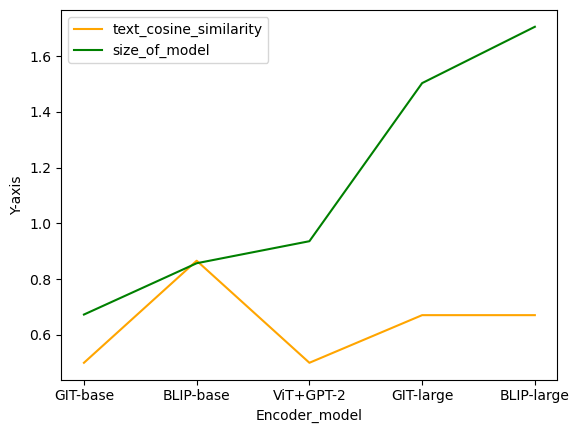

In [38]:
### Plotting performences of two similarity metrices by five encoder models without background###

cosine_similaritys = [0.5,0.8660254037844387,0.5,0.6708203932499369,0.6708203932499369]

size_of_model = [.673,.857,.936,1.503,1.705]
x = ['GIT-base','BLIP-base','ViT+GPT-2','GIT-large','BLIP-large']

plt.plot(x, cosine_similaritys, label='text_cosine_similarity',color="orange")
plt.plot(x, size_of_model, label='size_of_model',color="green")

plt.xlabel('Encoder_model')
plt.ylabel('Y-axis')
plt.legend()